# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
# Your code here.
student_data = pd.DataFrame({'age': [17,51,27,21,36,48,19,26,54,30], 'tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data.head()

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

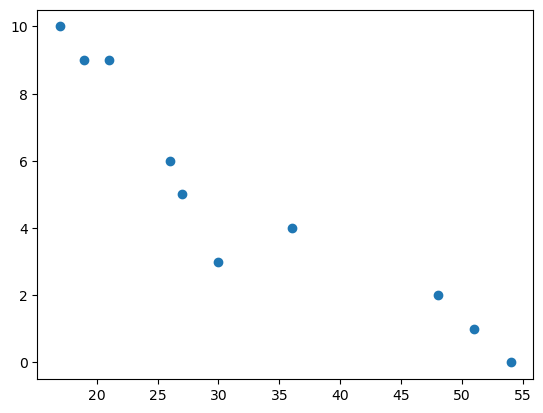

In [3]:
# Your code here.
plt.scatter(student_data["age"],student_data["tardies"])
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
#There is definitely a trend visible in the data, showing a negative correlation between age and tardiness - as suspected.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
#correlation:
student_data.corr() #corr = -0.939163
#There is a negative Pearson correlation between the variables, which points to a negative linear relationship. 
#With the value close to one, it can be called a very strong relationship.

#covariance:
student_data.cov() #cov = -45.566667
#There is a negative covariance between the variables, which points to a negative linear relationship. 
# The size of the number is absulote and therefore hard to interpret.

,age,tardies
age,187.655556,-45.566667
tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# Your response here.

#I use a linear regression.

#define dependent and independent variable:
x = student_data[["age"]] #independent
y = student_data["tardies"]
         
# create the model for linear regression
model = linear_model.LinearRegression()

# fit the model into our data
result = model.fit(x,y)

print("The intercept of the regression line is: ", result.intercept_)
print("The slope of the regression line is: ", result.coef_[0])

The intercept of the regression line is:  12.888803363135768
The slope of the regression line is:  -0.2428207709159808


Plot your regression model on your scatter plot.

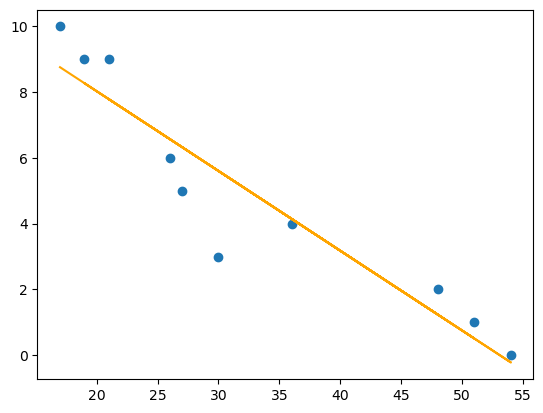

In [6]:
# Your code here.
regression_line = result.coef_[0] * x + result.intercept_
plt.plot(x,regression_line, c="orange")
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
#The conclusion is that there is a strong, negative relationship between the two variables, age is a good predictor
# of tardiness.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [7]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [17]:
# Your response here. 
# independent: Year, Cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year
# dependent: CO2 Emission Grams/Mile
corr1 = vehicles["Year"].corr(vehicles["CO2 Emission Grams/Mile"])
print("Correlation between Year and CO2 Emission Grams/Mile is: ", round(corr1, 2))
corr2 = vehicles["Cylinders"].corr(vehicles["CO2 Emission Grams/Mile"])
print("Correlation between Cylinders and CO2 Emission Grams/Mile is: ", round(corr2, 2))
corr3 = vehicles["Fuel Barrels/Year"].corr(vehicles["CO2 Emission Grams/Mile"])
print("Correlation between Fuel Barrels/Year and CO2 Emission Grams/Mile is: ", round(corr3, 2))
corr4 = vehicles["Combined MPG"].corr(vehicles["CO2 Emission Grams/Mile"])
print("Correlation between Combined MPG and CO2 Emission Grams/Mile is: ", round(corr4, 2))
corr5 = vehicles["Fuel Cost/Year"].corr(vehicles["CO2 Emission Grams/Mile"])
print("Correlation between Fuel Cost/Year and CO2 Emission Grams/Mile is: ", round(corr5, 2))

#The strongest correlation exists between Fuel Barrels/Year and CO2 Emission Grams/Mile with 0.99.
# This means this is also the most important in determining CO2 Emissions.
#The least information can be drawn out of the Year, this has only a weaker correlation of -0.22 with CO2 Emissions (the
# newer the car, the less emissions it has - would be nice but doesn't hold up often it seems).

Correlation between Year and CO2 Emission Grams/Mile is:  -0.22
Correlation between Cylinders and CO2 Emission Grams/Mile is:  0.75
Correlation between Fuel Barrels/Year and CO2 Emission Grams/Mile is:  0.99
Correlation between Combined MPG and CO2 Emission Grams/Mile is:  -0.93
Correlation between Fuel Cost/Year and CO2 Emission Grams/Mile is:  0.93


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [16]:
# Your response here. 
#define dependent and independent variable:
x = vehicles[["Fuel Barrels/Year"]] #independent 
# tried it also with more independent variables: "Fuel Cost/Year","Combined MPG","Cylinders","Year" 
y = vehicles["CO2 Emission Grams/Mile"]
         
# create the model for linear regression
model = linear_model.LinearRegression()

# fit the model into our data
result = model.fit(x,y)

result.score(x,y)
print("The r-squared is (the closer to 1 the better): ", result.score(x,y))
print("The mean squared error is (the closer to 0 the better): ", np.sqrt(mean_squared_error(result.predict(x),y)))

#A logistic regression does not make sense as it is not data with only two choices, 0 and 1, but numeric values.

# I tried it first as a multilinear regression, with all given parameters. It seems to deliver a very good prediction, 
# as r-squared is close to 1 with 0.980291. It can't be plotted any more as it has too many dimensions. The MSE is 16.466.

#However, the prediction can be improved by using less factors, leaving the factor with the least correlation out (Year),
# the r-squared reaches 0.980873 - a little bit more. The MSE is 16.714, still very similar.
#And actually, the prediction is best if it is not multilinear but just with 1 dimension in the independent variable (Fuel 
# Barrels/Year), as this variable shows such a high correlation. Then, the r-squared reaches 0.972568. However, the MSE also 
# rises up to 19.719, which is not the direction the MSE is supposed to go, it is worse than in the multilinear prediction.

The r-squared is (the closer to 1 the better):  0.9725680773391494
The mean squared error is (the closer to 0 the better):  19.719267688634304


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [45]:
# Your code here.
party_attending = pd.DataFrame({'x': [1,3,4,6,8,9,11,14], 'y': [1,2,4,4,5,7,8,13]})
party_attending.head()

,x,y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

The intercept of the regression line is:  -0.43939393939393945
The slope of the regression line is:  0.8484848484848485
The r-squared, r² is (the closer to 1 the better):  0.9316696375519905
The mean squared error is (the closer to 0 the better):  0.9333874443188752


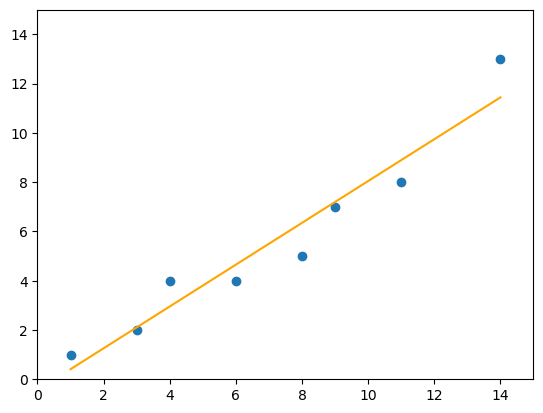

In [47]:
# Your code here.
x = party_attending[["x"]]
y = party_attending["y"]
# create the model for linear regression
model = linear_model.LinearRegression()

# fit the model into our data
result = model.fit(x,y)

print("The intercept of the regression line is: ", result.intercept_)
print("The slope of the regression line is: ", result.coef_[0])
print("The r-squared is (the closer to 1 the better): ", result.score(x,y))
print("The mean squared error is (the closer to 0 the better): ", np.sqrt(mean_squared_error(result.predict(x),y)))

regression_line = result.coef_[0] * x + result.intercept_
plt.plot(x,regression_line, c="orange")
plt.scatter(x,y)
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [35]:
# Your response here. 

#There is a strong positive correlation between the two variables "invited" and "attending". This is visible in the 
# regression plot: The scattering around the line is clustered very close to the line, so predicting new values by 
# using the regression line will probably produce results close to actual values.
# The regression line has an r-squared close to 1 with 0.93, which points to high predictability. 

#The suspected relationship is proven with this dataset, also not to a strong extent: for every 10 guest more invited, 
# 8.5 guests more show up (by the slope-value). So the more people are invited, the more people are also going to cancel 
# attendance.


0.9652303546573691

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

The intercept of the regression line is:  0.32330827067669077
The slope of the regression line is:  0.6842105263157896
The r-squared is (the closer to 1 the better):  0.9433811802232854


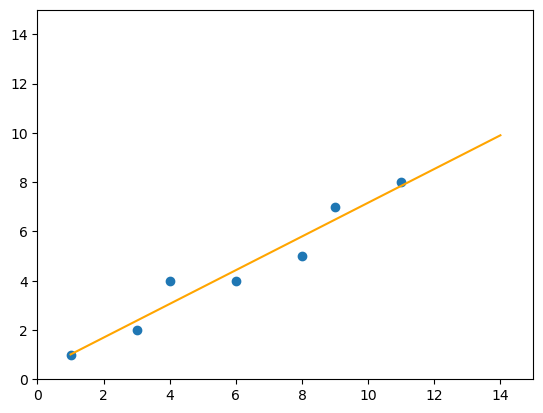

In [48]:
# Your response here. 

# I don't see any outliers. 
#For the exercise I'll remove the datapoint that seems the furthest away from the regression line (x=14,y=13)
party_attending
party_attending.drop([7], inplace=True)

result = model.fit(party_attending[["x"]],party_attending["y"])

print("The intercept of the regression line is: ", result.intercept_)
print("The slope of the regression line is: ", result.coef_[0])
print("The r-squared is (the closer to 1 the better): ", result.score(party_attending[["x"]],party_attending["y"]))


regression_line = result.coef_[0] * x + result.intercept_
plt.plot(x,regression_line, c="orange")
plt.scatter(party_attending["x"],party_attending["y"])
plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [43]:
# Your response here. 

#The regression line changed position a bit. It is better in the sense that it does not hit the y axis in the negative
# space anymore - which is impossible if both axis map people. Now it intercepts at 0.32.
#The r-quared is a bit closer to 1 with 0.94 (instead of 0.93).
#The slope is not so steep anymore, it changed from 0.85 to 0.68. That means we would predict now: for every 10 guests more
# invited, only 6.8 show up, so our attendence rate has gone down a lot. This is more along the lines what the host suspected.
